In [2]:
from si import *

Not a jupyter notebook. Not enabling notebook functions.
Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [3]:
filepath = "./data/dqc_files/"
files = os.listdir(filepath)
print(files)

['gm2DQC_ana_33965887_26201.00099.root', 'gm2DQC_ana_33540934_26185.00080.root', 'gm2DQC_ana_33965890_26134.00006.root', 'gm2DQC_ana_33965886_26136.00106.root', 'gm2DQC_ana_33540934_26132.00007.root', 'gm2DQC_ana_33540934_26125.00009.root', 'gm2DQC_ana_33540934_26136.00048.root', 'gm2DQC_ana_33965888_26227.00000.root', 'gm2DQC_ana_33965887_26220.00003.root', 'gm2DQC_ana_33965887_26091.00014.root', 'gm2DQC_ana_33965894_26090.00492.root', 'gm2DQC_ana_33540932_26131.00006.root', 'gm2DQC_ana_33965894_26185.00034.root', 'gm2DQC_ana_33965891_26147.00114.root', 'gm2DQC_ana_33965894_26178.00030.root', 'gm2DQC_ana_33540935_26259.00007.root', 'gm2DQC_ana_33965889_26201.00193.root', 'gm2DQC_ana_33540934_26136.00054.root', 'gm2DQC_ana_33965886_26150.00267.root', 'gm2DQC_ana_33965886_26128.00007.root', 'gm2DQC_ana_33965886_26101.00051.root', 'gm2DQC_ana_33965894_26203.00300.root', 'gm2DQC_ana_33540935_26036.00006.root', 'gm2DQC_ana_33965894_26147.00119.root', 'gm2DQC_ana_33540936_26129.00004.root',

In [4]:
f = r.TFile("./data/dqc_files/gm2DQC_ana_34007816_26100.00408.root")
f.cd("offNearlineWithDQC")
f.ls()

TFile**		./data/dqc_files/gm2DQC_ana_34007816_26100.00408.root	
 TFile*		./data/dqc_files/gm2DQC_ana_34007816_26100.00408.root	
  TDirectoryFile*		offNearlineWithDQC	offNearlineWithDQC (CaloOffNearlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	calo16
   KEY: TDirectoryFile	calo17;1	calo17
   KEY: TDirectoryFile	calo18;1	calo18
   KEY: TDirectoryFile	calo19;1	calo19
   KEY: TDirectoryFile	calo20;1	calo20
   KEY: TDirectory

In [5]:
dirnames = [
    'offNearlineWithDQC',
    'offNearlineWithT0DQC',
    'offNearlineWithLaserDQC',
    'offNearlineWithKickerDQC',
    'offNearlineNoDQC',
]

toplot = 'allCaloWiggle'

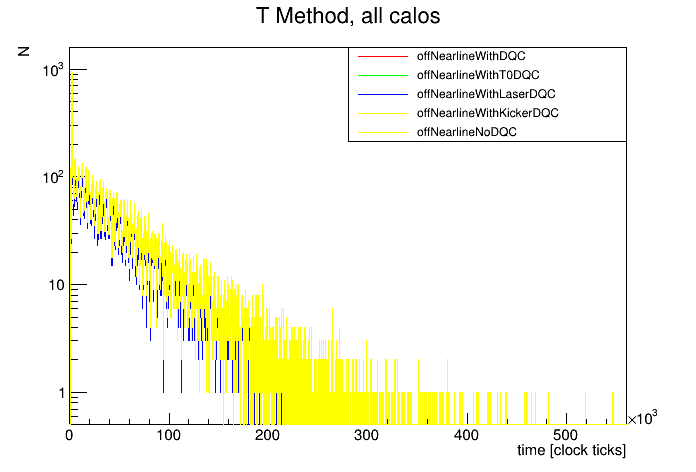

In [6]:
c = r.TCanvas()

leg = r.TLegend(0.5,0.7,0.9,0.9)

for i,name in enumerate(dirnames):
    hi = f.Get(name+"/"+toplot).Clone()
    hi.SetLineColor(i+1)
    
    if(i>0):
        hi.DrawCopy("hist same")
    else:
        hi.DrawCopy("hist")
    leg.AddEntry(hi,name,"l")
    
    
c.SetLogy()
leg.Draw()
c.Draw()

In [7]:
hists = []
for i, file in enumerate(files):
    if(".root" in file):
        fi = r.TFile(filepath+file)
        for j,name in enumerate(dirnames):
            hi = fi.Get(name+"/"+toplot).Clone()
            #print(hi)
            hi.SetLineColor(i+1)
            hi.SetDirectory(0)
            
            try:
                if(i < 1):
                    hists.append(hi.Clone(name))
                    hists[j].SetDirectory(0)
                else:
                    hists[j].Add(hi)
            except:
                print("Error in:", file)
print(hists)

[<ROOT.TH1D object ("offNearlineWithDQC") at 0x55e8f97fc930>, <ROOT.TH1D object ("offNearlineWithT0DQC") at 0x55e8f9af8490>, <ROOT.TH1D object ("offNearlineWithLaserDQC") at 0x55e8f98cd9f0>, <ROOT.TH1D object ("offNearlineWithKickerDQC") at 0x55e8f9876c40>, <ROOT.TH1D object ("offNearlineNoDQC") at 0x55e8f9ae4560>]


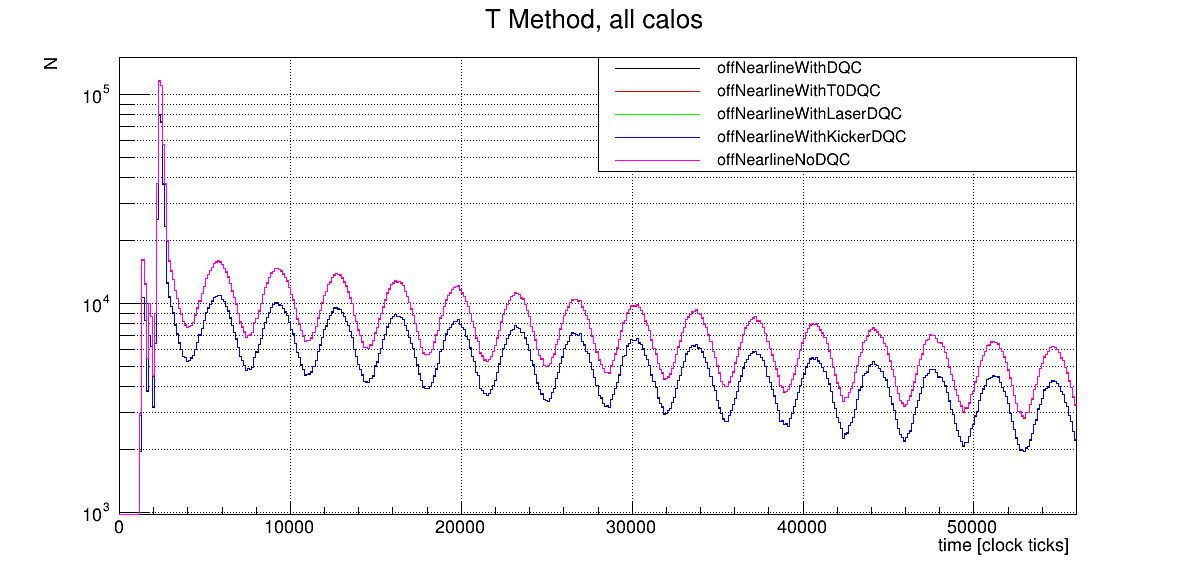

In [8]:
c = r.TCanvas("c","c",1200,600)

leg = r.TLegend(0.5,0.7,0.9,0.9)

for i,name in enumerate(dirnames):
    hi = hists[i]
    if(i < 4):
        hi.SetLineColor(i+1)
    else:
        hi.SetLineColor(i+2)
    hi.GetXaxis().SetRangeUser(0,70*1000/1.25)
    
    if(i>0):
        hi.DrawCopy("hist same")
    else:
        hi.DrawCopy("hist")
    leg.AddEntry(hi,name,"l")
    
    
c.SetLogy()
leg.Draw()
c.SetGrid()
c.Draw()